In [2]:
#사용할 데이터셋과 모델 임포트
from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

#넘파이 임포트
import numpy as np


mnist = fetch_openml('mnist_784', version=1, as_frame=False) # as_frame = True 넘파이로 반환
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
#이미지를 동서남북 방향으로 shift 할 scipy 모듈 import 
from scipy.ndimage.interpolation import shift
import matplotlib.pyplot as plt

C:\Users\차태관\AppData\Local\Temp\ipykernel_10992\635857321.py:2: DeprecationWarning: Please use `shift` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  from scipy.ndimage.interpolation import shift


In [4]:
#데이터와 타겟 레이블을 추출
X, y = mnist["data"], mnist["target"]
#데이터 형태 확인
X.shape

(70000, 784)

In [5]:
# target 레이블 은 문자열이기 때문에 정수로 변환
y = y.astype(np.uint8) 
# 59999번 인덱스를 기준으로 훈련 세트와 테스트 세트를 나눔
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:] 

In [6]:
#이미지를 reshape 해서 이미지를  dx, dy 만큼 변환한 뒤 원래 형태로 반환하는 함수
def shift_image(image, dx, dy):
  image = image.reshape((28,28))
  shifted_image = shift(image, [dx, dy], cval = 0)
  return shifted_image.reshape([-1])

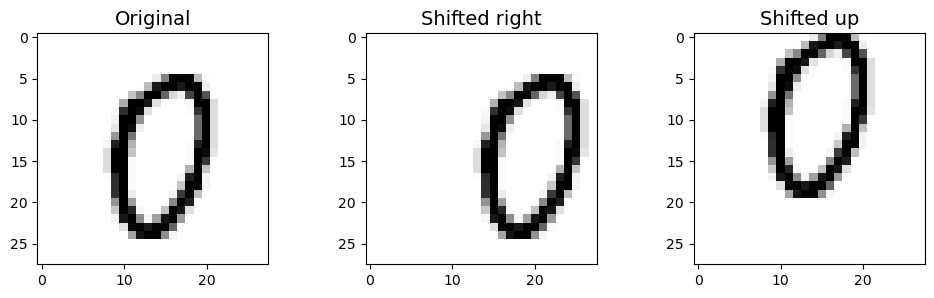

In [7]:
#함수가 잘 작동 하는지 확인하기 위해 이미지를 변형 후 확인해본다. 
image = X_train[1000]
shifted_image_right = shift_image(image, 0, 5)
shifted_image_up = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(132)
plt.title("Shifted right", fontsize=14)
plt.imshow(shifted_image_right.reshape(28, 28), interpolation="nearest", cmap="Greys")

plt.subplot(133)
plt.title("Shifted up", fontsize=14)
plt.imshow(shifted_image_up.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [8]:
#테스트 세트를 새로운 expanded 변수에 복사
X_train_expanded = [image for image in X_train]
y_train_expanded = [label for label in y_train]

In [ ]:
# for문 사용하여 이미지들을 이동 후 expanded 에 덧붙여준다. 타겟은 변형할 필요 X 
for dx, dy in ((0,1), (0,-1), (-1,0), (1,0)):
  for image, label in zip(X_train, y_train):
    X_train_expanded.append(shift_image(image, dx, dy))
    y_train_expanded.append(label)


In [ ]:
X_train_expanded = np.array(X_train_expanded)
y_train_expanded = np.array(y_train_expanded)

In [ ]:
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]
knn_clf = KNeighborsClassifier() 
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train_expanded, y_train_expanded)

In [ ]:
#최적의 파라미터 값 확인
grid_search.best_params_

#테스트 세트에서의 최고 성적은 대략 97% 의 정확도.
grid_search.best_score_

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = grid_search.predict(X_test)
accuracy_score(y_test, y_pred)